#Контест

Выполнил: Малько Павел М8О-309Б-22

Перед началом работы импортируем нужные нам библиотеки

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

#Первичная обработка данных

Загрузим тренировочный и тестовый наборы данных для обучения модели и предсказания значений.

In [43]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Сразу произведём удаление дубликатов, строк с пропусками данных, не затрагивая при этом категориальные данные.

In [44]:
df_train = df_train.dropna().drop_duplicates().select_dtypes(include=[np.number])
df_test = df_test.dropna().drop_duplicates().select_dtypes(include=[np.number])

#Анализ распределения целевой переменной

Визуализируем распределение RiskScore

<Axes: ylabel='Frequency'>

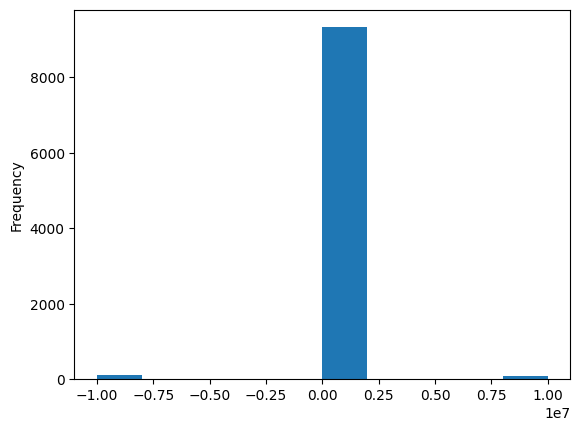

In [45]:
df_train['RiskScore'].plot.hist()

Произведём выброс сильно выбивающихся значений.

<Axes: ylabel='Frequency'>

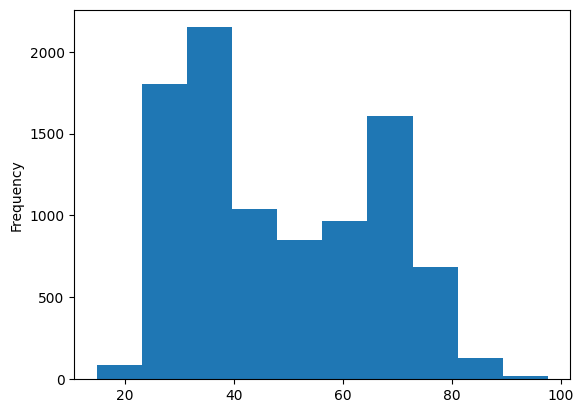

In [46]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]
df_train['RiskScore'].plot.hist()

#Выявление зависимостей между признаками

Получим матрицу корелляций числовых признаков.


In [47]:
correlation_matrix = df_train.corr()

Признаки коррелируют с целевой переменной RiscScore следующим образом:

In [48]:
print(correlation_matrix['RiskScore'].sort_values(ascending=False))

RiskScore                     1.000000
BaseInterestRate              0.759546
InterestRate                  0.744193
TotalDebtToIncomeRatio        0.554352
BankruptcyHistory             0.179697
MonthlyLoanPayment            0.147417
DebtToIncomeRatio             0.109422
LoanAmount                    0.079041
PreviousLoanDefaults          0.055248
CreditCardUtilizationRate     0.053080
LoanDuration                  0.025265
UtilityBillsPaymentHistory    0.021388
TotalLiabilities              0.018201
MonthlyDebtPayments           0.017922
JobTenure                     0.014337
PaymentHistory                0.014103
NumberOfDependents            0.008190
NumberOfOpenCreditLines      -0.001151
SavingsAccountBalance        -0.002926
CheckingAccountBalance       -0.007520
NumberOfCreditInquiries      -0.016172
Age                          -0.042744
Experience                   -0.044865
LengthOfCreditHistory        -0.055507
NetWorth                     -0.146222
TotalAssets              

Выведем матрицу корреляций и определим сильно коррелирующие данные.

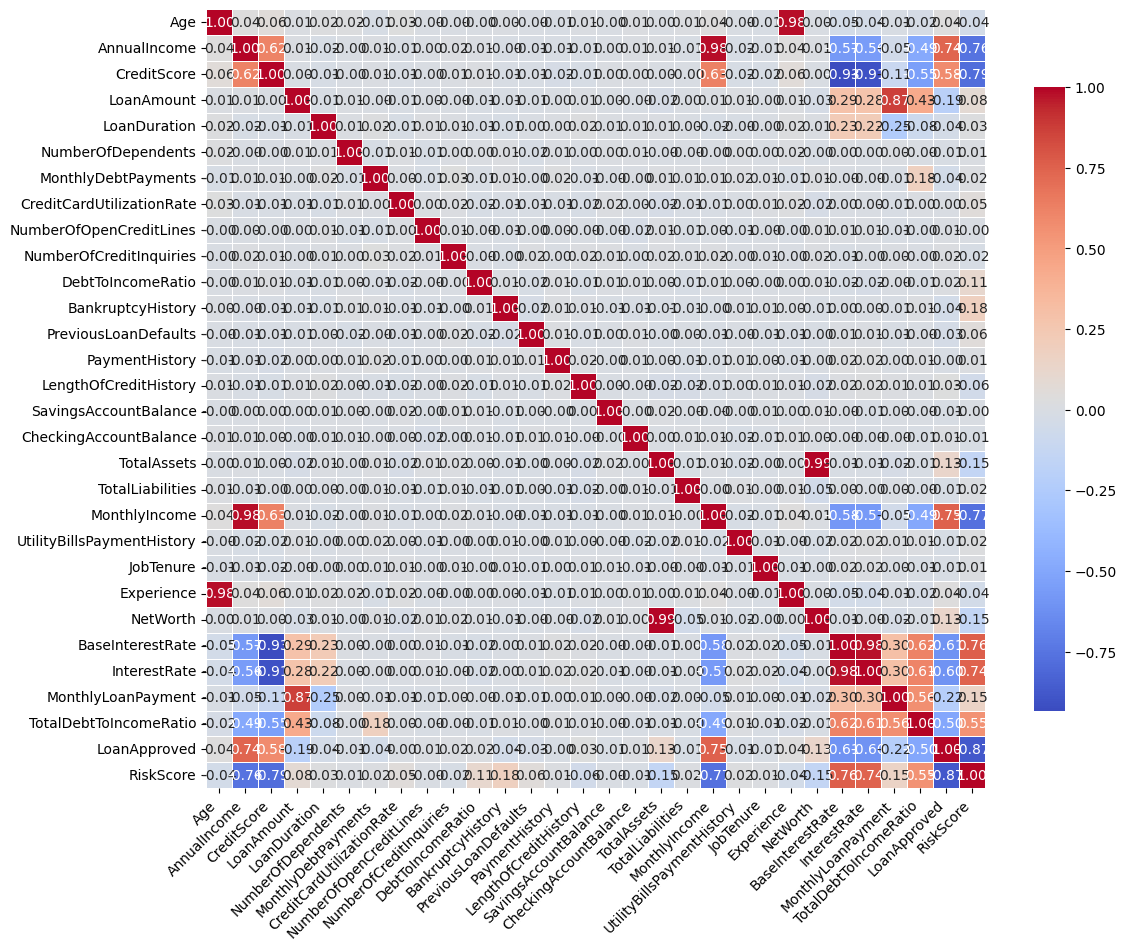

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.75}, square=True)

# Настраиваем заголовок и метки для более качественного отображения
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#Обучение модели

Для начала выделим признаки X и целевую переменную Y из обучающего набора данных.

In [50]:
X = df_train.loc[:, df_train.columns != 'RiskScore']
y = df_train['RiskScore']

Разделим данные на обучающую и тестовую выборки.

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Инициализируем модель линейной регрессии и обучим на тренировочной выборке.

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Получим предсказание на тестовой выборке и оценим точность модели при помощи MSE и R²

In [54]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE) на тестовых данных: {mse}")
print(f"Коэффициент R² на тестовых данных: {r2}")

Mean Squared Error (MSE) на тестовых данных: 20.475549417312635
Коэффициент R² на тестовых данных: 0.9316217941887361


Воспользуемся моделью на тестовых данных и получим csv файл.

In [55]:
X_test = df_test.drop(columns=['ID'])

In [56]:
y_test_pred = model.predict(X_test)

In [57]:
df_result = pd.DataFrame({
    'ID': df_test['ID'],
    'RiskScore': y_test_pred
})

df_result.to_csv('contest.csv', index=False)